In [1]:
from __future__ import print_function
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os
import glob

#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] # larger image
#matplotlib.rcParams['figure.figsize']= (20.0, 10.0) # larger image


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]

matplotlib version: 3.3.3
pandas version: 1.1.4
numpy version: 1.19.4
seaborn version: 0.11.0


In [12]:
root_path = '../5-Reproducibility'  # The path to the directory containing the systems

igbs = ['igb1', 'igb2', 'igb5', 'igb7', 'igb8']  # Each of the systems as named in their directory

ffs = ['ff94','ff96','ff98','ff99', 'ff99SB', 'ff99SBildn', 'ff99SBnmr', 'ff03.r1', 'ff14SB', \
       'ff14SBonlysc','ff14ipq','fb15','ff15ipq']  # The name of the state directories

runs = ['1','2','3','4']

filename_pattern = 'helicity.dat'  # The glob to match the data files to read

dfs = {}  # Mapping of system name to list of state DataFrames

igbff_all = []
for ff in ffs:
    #igbff_all = []
    for igb in igbs:
        for run in runs: 
            direc=igb + '_'+ ff +'_'+ run
            # For each system and state, grab all the data files that match the glob
            file_glob = os.path.join(root_path, direc, filename_pattern)
            files = glob.glob(file_glob)
            for f in files:
                # Read each into a file to be put into a dict
                df = pd.read_csv(f, sep=r'\s+', skiprows=1, names=['Frame', 'Fraction helicity'])
                df[r'Time ($\mu$s)'] = df['Frame']/10000
                df['Helicity (%)'] = df['Fraction helicity']*100*33/31
                df['Mouving average']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).mean()
                df['igb'] = igb
                df['ff'] = ff
                df['run'] = run
                df['ffigb'] = '{0} {1}'.format(ff, igb)
                df['ffigbrun'] = '{0} {1} run {2}'.format(ff, igb, run)
                df['igbff'] = '{0} {1}'.format(igb, ff)
                df['igbffrun'] = '{0} {1} run {2}'.format(igb, ff, run)
                igbff_all.append(df)
df_total = pd.concat(igbff_all)
print(df_total.head())

   Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
0      1              0.848         0.0001     90.270968              NaN   
1      2              0.848         0.0002     90.270968              NaN   
2      3              0.848         0.0003     90.270968              NaN   
3      4              0.848         0.0004     90.270968              NaN   
4      5              0.818         0.0005     87.077419              NaN   

    igb    ff run      ffigb         ffigbrun      igbff         igbffrun  
0  igb8  ff96   1  ff96 igb8  ff96 igb8 run 1  igb8 ff96  igb8 ff96 run 1  
1  igb8  ff96   1  ff96 igb8  ff96 igb8 run 1  igb8 ff96  igb8 ff96 run 1  
2  igb8  ff96   1  ff96 igb8  ff96 igb8 run 1  igb8 ff96  igb8 ff96 run 1  
3  igb8  ff96   1  ff96 igb8  ff96 igb8 run 1  igb8 ff96  igb8 ff96 run 1  
4  igb8  ff96   1  ff96 igb8  ff96 igb8 run 1  igb8 ff96  igb8 ff96 run 1  


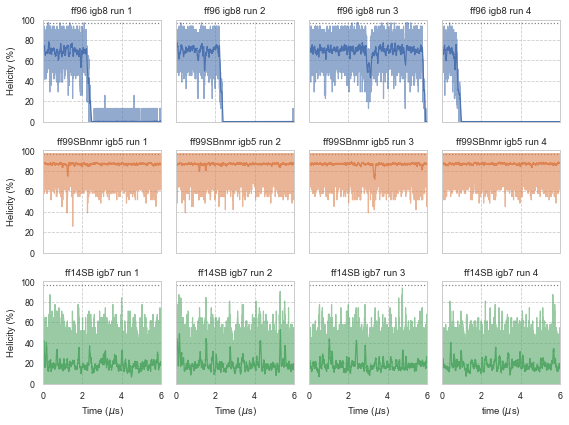

In [20]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_total, col="ffigbrun", col_wrap=4, hue="ffigb", height=2, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=96.76, ls=":", c=".5") # 90.9*33/31

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average').set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=0.6).set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 6) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
#plt.ylabel('Percentage helicity (%)')
plt.tight_layout()
plt.savefig('./plots/reproducibility_ts_1.pdf')
# plt.savefig('./plots/helicity2.png', dpi=300)
plt.show()

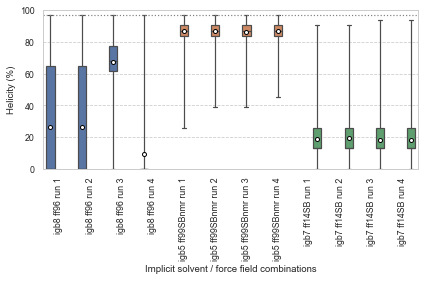

In [19]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

# fig, axes = plt.subplots(figsize=(18, 10))

ax=sns.boxplot(x='igbffrun', y='Helicity (%)', data=df_total, fliersize=2,whis=[0, 100],
               showmeans=True,hue="ffigb",
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"4"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
ax.get_legend().remove()
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
plt.tight_layout()
plt.savefig('./plots/reproducibility_box_1.pdf')